# fig — rotate (final)

**Motivation**: host = ```mach```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from figures.analysis import *

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

In [3]:
fig_base_dir = pjoin(fig_base_dir, 'iclr_oct02', 'rotate')
os.makedirs(fig_base_dir, exist_ok=True)
print(os.listdir(fig_base_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

['<jacob|mlp>_(64,24.0)', '<mlp|mlp>_(64,24.0)', 'MNIST_theta-90']

## VAE: amort and iterative

### iP-VAE

In [4]:
mnist_to_load = get_mnist_models(device)
print(sorted(mnist_to_load))

[
    '<conv|conv>_(16,8.0)',
    '<conv|conv>_(4,1.5)',
    '<jacob|conv>_(16,8.0)',
    '<jacob|conv>_(2,0.75)',
    '<jacob|conv>_(4,1.5)',
    '<jacob|mlp>_(16,8.0)',
    '<jacob|mlp>_(4,1.5)',
    '<jacob|mlp>_(64,24.0)',
    '<mlp|mlp>_(16,8.0)',
    '<mlp|mlp>_(4,1.5)',
    '<mlp|mlp>_(64,24.0)'
]

In [5]:
selected_models = [
    '<jacob|mlp>_(64,24.0)',
    '<mlp|mlp>_(64,24.0)',
]

In [6]:
trainers = {}
for model_name in selected_models:
    trainers[model_name] = load_model(
        **mnist_to_load[model_name])[0]

## Rotated files

In [8]:
from analysis.corrupt import perform_corruption_analysis

load_dir = pjoin(tmp_dir, 'corrupted_data')
files = sorted(os.listdir(load_dir), key=alphanum_sort_key)

tgt_ds = 'MNIST'
pat = 'rotate-angle'
thetas = np.arange(15, 180 + 1, 15)

file_paths = {}
for theta in thetas:
    f = next(
        f for f in files if (
            f.startswith(tgt_ds) and
            f"{pat}-{theta}" in f
        )
    )
    analysis_name = f.split('.')[0]
    key = (theta, analysis_name)
    file_paths[key] = pjoin(load_dir, f)

In [9]:
data = {}
for key, file in file_paths.items():
    corrupted_data = np.load(
        file, allow_pickle=True).item()
    data[key] = corrupted_data
    
    print({k: v for k, v in corrupted_data.items() if not k.startswith('x_')})

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 15, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 30, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 45, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 60, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 75, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 90, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 105, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 120, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 135, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 150, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 165, 'hist_match': True, 'interpolation': 'bilinear'}}

{'corruption_type': 'rotate', 'corruption_kws': {'angle': 180, 'hist_match': True, 'interpolation': 'bilinear'}}

## Perform analysis

In [10]:
kws_analysis = dict(
    tr=None,
    corrupted_data=None,
    mse_wrt_orig=False,
    t_recon=100,
    verbose=True,
)

100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.18it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-15

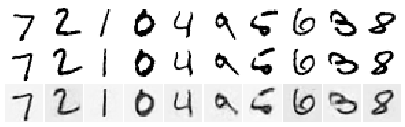

100%|█████████████████████████████████████████| 300/300 [01:31<00:00,  3.28it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-30

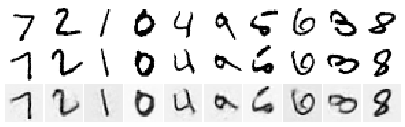

100%|█████████████████████████████████████████| 300/300 [01:21<00:00,  3.69it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-45

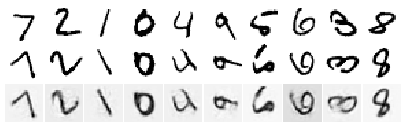

100%|█████████████████████████████████████████| 300/300 [01:29<00:00,  3.35it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-60

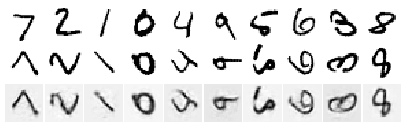

100%|█████████████████████████████████████████| 300/300 [01:32<00:00,  3.26it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-75

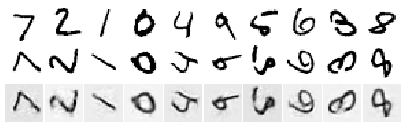

100%|█████████████████████████████████████████| 300/300 [01:37<00:00,  3.07it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-90

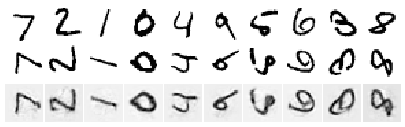

100%|█████████████████████████████████████████| 300/300 [01:32<00:00,  3.23it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-105

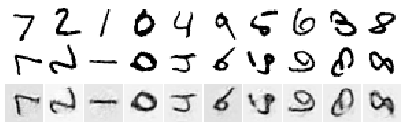

100%|█████████████████████████████████████████| 300/300 [01:29<00:00,  3.36it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-120

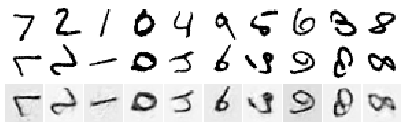

100%|█████████████████████████████████████████| 300/300 [01:28<00:00,  3.41it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-135

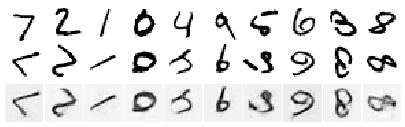

100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.18it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-150

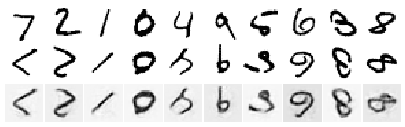

100%|█████████████████████████████████████████| 300/300 [01:27<00:00,  3.41it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-165

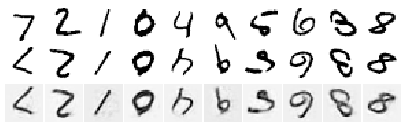

100%|█████████████████████████████████████████| 300/300 [01:36<00:00,  3.12it/s]


______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   ———     MNIST_rotate-angle-180

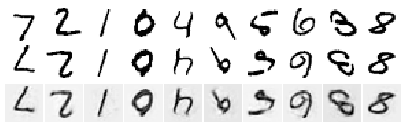

100%|█████████████████████████████████████████| 300/300 [02:25<00:00,  2.06it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-15

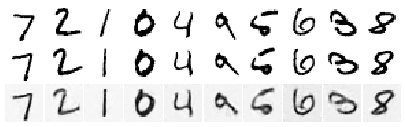

100%|█████████████████████████████████████████| 300/300 [02:26<00:00,  2.05it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-30

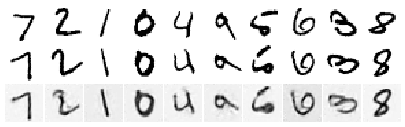

100%|█████████████████████████████████████████| 300/300 [02:26<00:00,  2.04it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-45

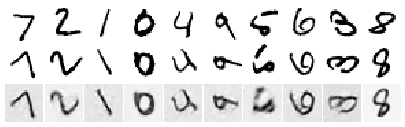

100%|█████████████████████████████████████████| 300/300 [02:25<00:00,  2.06it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-60

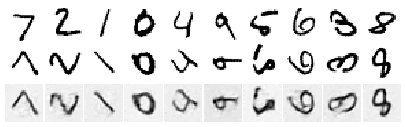

100%|█████████████████████████████████████████| 300/300 [02:03<00:00,  2.43it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-75

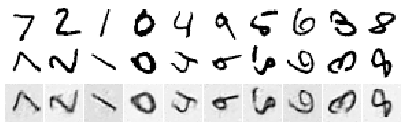

100%|█████████████████████████████████████████| 300/300 [02:31<00:00,  1.98it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-90

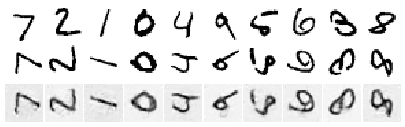

100%|█████████████████████████████████████████| 300/300 [03:03<00:00,  1.64it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-105

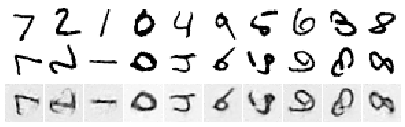

100%|█████████████████████████████████████████| 300/300 [03:42<00:00,  1.35it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-120

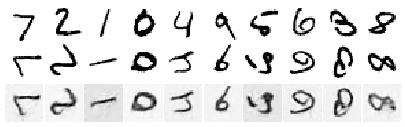

100%|█████████████████████████████████████████| 300/300 [02:52<00:00,  1.74it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-135

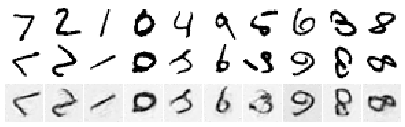

100%|█████████████████████████████████████████| 300/300 [04:35<00:00,  1.09it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-150

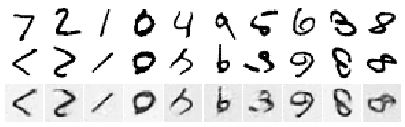

100%|█████████████████████████████████████████| 300/300 [04:53<00:00,  1.02it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-165

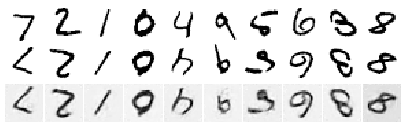

100%|█████████████████████████████████████████| 300/300 [04:11<00:00,  1.19it/s]


______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     ———     MNIST_rotate-angle-180

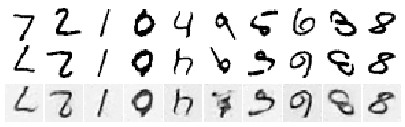

In [11]:
df = collections.defaultdict(list)

inds = None
for model_name, tr in trainers.items():
    fig_dir = pjoin(fig_base_dir, model_name)
    os.makedirs(fig_dir, exist_ok=True)
    
    inds = first_occurrence_inds(
        tr.dl_vld.dataset.tensors[1])
    kws_analysis['tr'] = tr
    
    for (theta, analysis_name), corrupted_data in data.items():
        kws_analysis['corrupted_data'] = corrupted_data
        results, accuracy = perform_corruption_analysis(
            **kws_analysis)

        # save results
        df['analysis_name'].append(analysis_name)
        df['model_name'].append(model_name)
        df['enc_type'].append(tr.model.cfg.enc_type)
        df['dec_type'].append(tr.model.cfg.dec_type)
        df['n_iters_train'].append(tr.model.cfg.seq_len)
        df['n_iters_test'].append(results['props']['t_recon'])
        df['theta'].append(theta)
        df['mse'].append(results['mse'].mean())
        df['accuracy'].append(accuracy.mean())

        # save figs
        x = tonp(tr.dl_vld.dataset.tensors[0][inds])
        fig, ax = plot_row_or_col(x, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_inpt.png"), **kws_fig)
        
        x_corrupted = corrupted_data['x_corrupted_vld'][inds]
        fig, ax = plot_row_or_col(x_corrupted, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_corrpt.png"), **kws_fig)
        
        x_recon = results['recon'][inds]
        x_recon = x_recon.reshape(tr.model.cfg.shape)
        fig, ax = plot_row_or_col(x_recon, row=False, display=False)
        fig.savefig(pjoin(fig_dir, f"{analysis_name}_{model_name}_recon.png"), **kws_fig)

        # plot results
        print('_' * 110)
        print(f"{model_name}\t———\t{analysis_name}")
        _ = plot_weights(
            w=np.concatenate([x, x_corrupted, x_recon]),
            nrows=3, cmap='Greys', vmin=0.001, vmax=1, dpi=50,
        )
        print('\n\n')

df = pd.DataFrame(df)

In [13]:
df

,analysis_name,model_name,enc_type,dec_type,n_iters_train,n_iters_test,theta,mse,accuracy
0,MNIST_rotate-angle-15,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,15,4.422994,0.9531
1,MNIST_rotate-angle-30,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,30,5.821667,0.9537
2,MNIST_rotate-angle-45,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,45,6.931849,0.9462
3,MNIST_rotate-angle-60,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,60,7.557413,0.9441
4,MNIST_rotate-angle-75,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,75,7.841317,0.9423
5,MNIST_rotate-angle-90,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,90,8.534567,0.9450
6,MNIST_rotate-angle-105,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,105,8.575300,0.9496
7,MNIST_rotate-angle-120,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,120,8.691176,0.9440
8,MNIST_rotate-angle-135,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,135,8.063354,0.9427
9,MNIST_rotate-angle-150,"<jacob|mlp>_(64,24.0)",jacob,mlp,64,100,150,6.918114,0.9443


<Axes: xlabel='theta', ylabel='mse'>

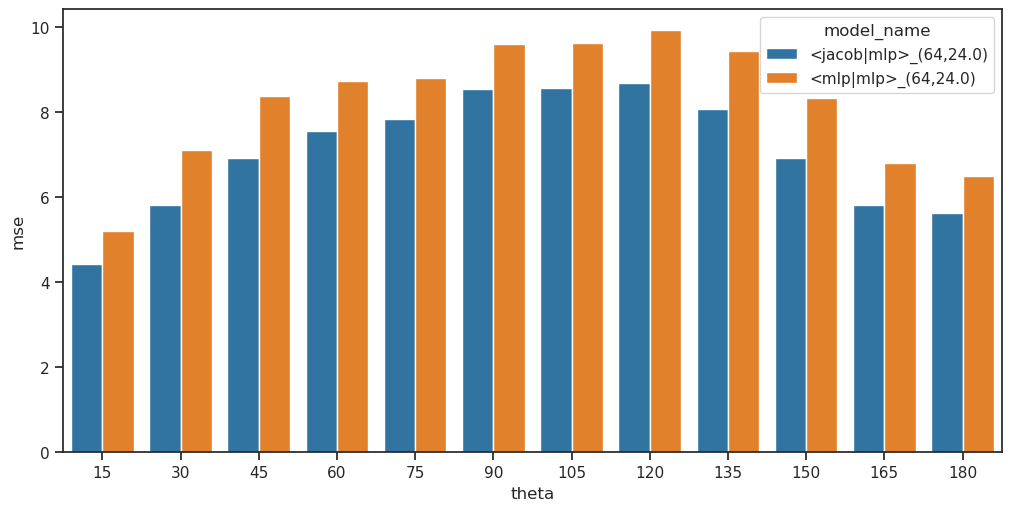

In [15]:
fig, ax = create_figure(1, 1, (10, 5))
sns.barplot(data=df, x='theta', y='mse', hue='model_name')

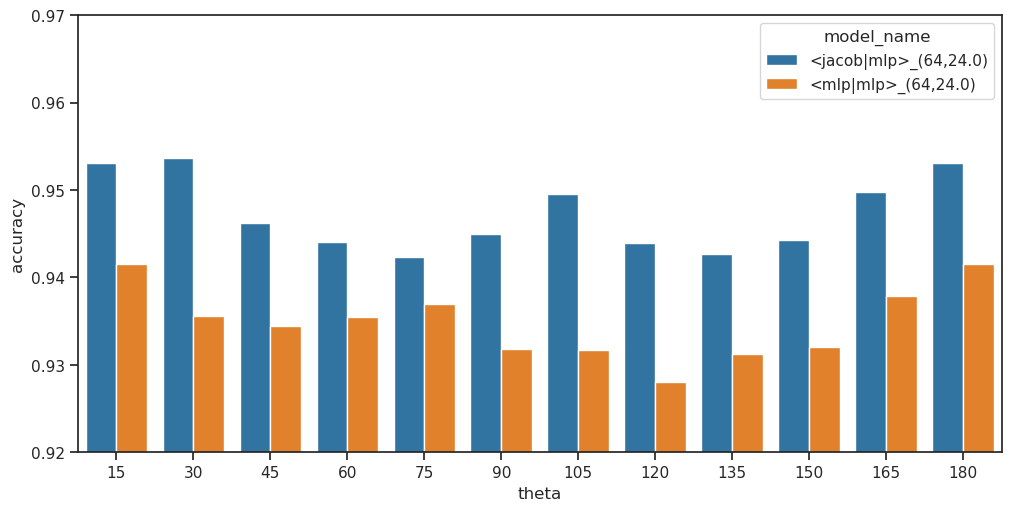

In [21]:
fig, ax = create_figure(1, 1, (10, 5))
sns.barplot(data=df, x='theta', y='accuracy', hue='model_name')
ax.set_ylim(0.92, 0.97)
plt.show()

In [ ]:
# dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/'
# mse_outside = pjoin(dekel_dir, 'mnist_mse_1000iter.npz')
# mse_outside = dict(np.load(mse_outside, allow_pickle=True))
# mse_outside = {
#     'sa-VAE': mse_outside['semi'],
#     'ia-VAE (hierarchical)': mse_outside['marino_h'],
#     'ia-VAE (single-level)': mse_outside['marino_sl'],
# }

In [51]:
dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/'
dekel_dir = pjoin(dekel_dir, 'rot')

outside_files = sorted(
    os.listdir(dekel_dir),
    key=alphanum_sort_key,
)
print(outside_files)

[
    'MARINO_MNIST_rotate-angle-105_mnist_single_level_iterative_MNIST_SL_10.npz',
    'MARINO_MNIST_rotate-angle-180_mnist_single_level_iterative_MNIST_SL_10.npz',
    'MARINO_MNIST_rotate-angle-45_mnist_hierarchical_iterative_MNIST_H_10.npz',
    'SAVAE_EMNIST_rotate-angle-60_Data_iter20.npz',
    'SAVAE_EMNIST_rotate-angle-75_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-135_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-180_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-30_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-45_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-60_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-75_Data_iter20.npz',
    'SAVAE_MNIST_rotate-angle-90_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-105_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-120_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-135_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-150_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-15_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-165_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-180_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-30_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-45_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-60_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-75_Data_iter20.npz',
    'SAVAE_Omniglot_rotate-angle-90_Data_iter20.npz'
]

In [52]:
# f = 'SAVAE_MNIST_rotate-angle-90_Data_iter20.npz'
f = 'MARINO_MNIST_rotate-angle-105_mnist_single_level_iterative_MNIST_SL_10.npz'

In [53]:
outside_rot = dict(np.load(pjoin(dekel_dir, f), allow_pickle=True))

In [54]:
outside_rot['recons'].shape

(10000, 11, 28, 28)

In [55]:
outside_rot['posteriors'].shape

(10000, 11, 2, 64)

In [56]:
outside_rot['mse']

array(18.962126, dtype=float32)

In [57]:
mu = outside_rot['posteriors'][:, -1, 0]
mu.shape

(10000, 64)

In [58]:
vld = make_dataset('MNIST', 'cpu')[1]

In [59]:
g = tonp(vld.tensors[1]).astype(int)

In [60]:
from analysis.clf import LogisticRegression

In [61]:
clf = LogisticRegression().fit(mu[:5000], g[:5000])
pred = clf.predict(mu[5000:])
accu = (pred == g[5000:]).mean()

In [62]:
accu

0.6852

In [63]:
accuracy

0.9416

(10000, 128)

In [66]:
lamb = np.exp(results['state'])

clf = LogisticRegression().fit(lamb[:5000], g[:5000])
pred = clf.predict(lamb[5000:])
accu_us = (pred == g[5000:]).mean()

In [67]:
accu_us

0.9056

In [30]:
outside_rot

NpzFile '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/rot/SAVAE_MNIST_rotate-angle-90_Data_iter20.npz' with keys: recons, posteriors, mse

In [ ]:
corrupt_dir = "/Data/hadi/corrupted_data/"

fs_c = [i for i in os.listdir(corrupt_dir) if i[-3:] == "npz" and "rotate" in i]
fs = [i for i in os.listdir(eval_dir)]
requested_dsets = ["mnist"]
requested_dsets = [i.lower() for i in requested_dsets]
for f in tqdm(fs):
    broken = f.split("_")
    proj = broken[0]
    if proj in ["MARINO", "SAVAE"]:
        ds = broken[1] 
        if ds.lower() in requested_dsets:
            rotation = broken[2]
            rotation_fl = f"{ds}_{rot}.npz"
            
            if proj == "MARINO":
                model = broken[-2] #either H or SL
            loaded = np.load(eval_dir+f)
            recons = loaded["recons"] #shape N, 1, h, w
            posteriors = loaded["posteriors"] #shape M, t, 2, d

In [ ]:
dekel_dir = "/Data/hadi/eval_results/rot/"

In [18]:
w = tr.model.layer.get_weight()
kurt = sp_stats.kurtosis(tonp(w), axis=1)

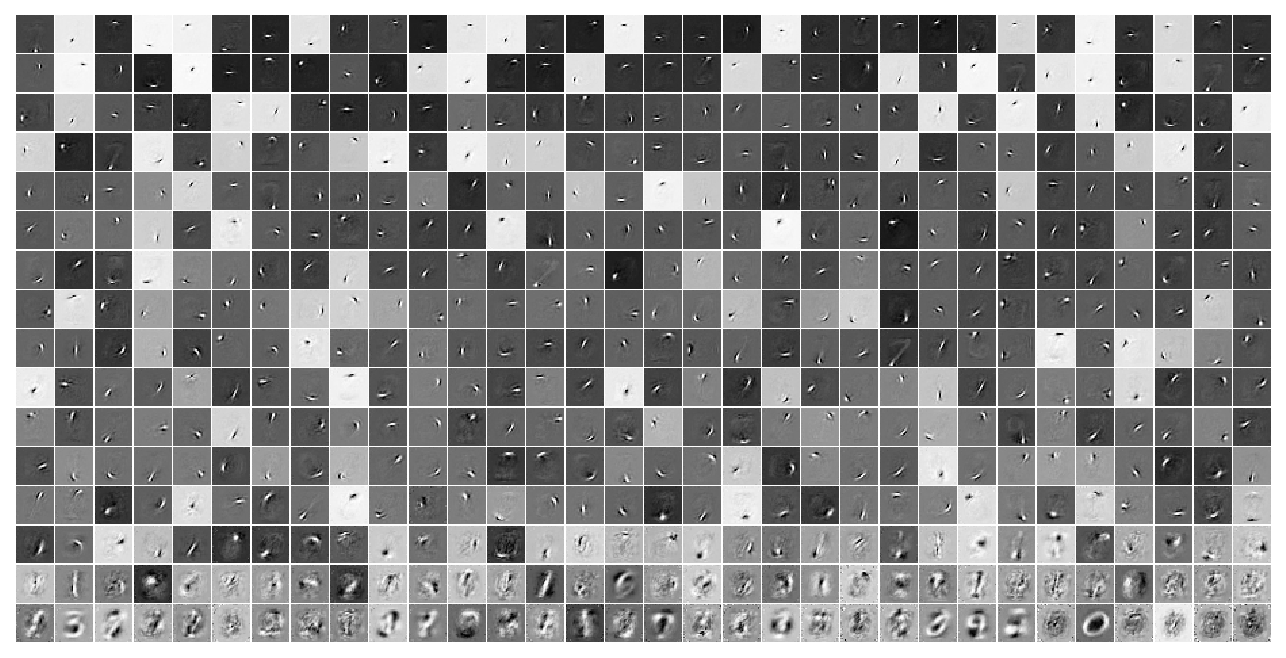

In [28]:
tr.model.show(order=np.argsort(kurt)[::-1]);